In [4]:
import collections
import glob
import itertools
import json
import matplotlib
rc_fonts = {
    "font.size": 12,
    "font.weight": 800,
    "font.family": "serif",
    "font.serif": ["Times"], # use latex's default
    "font.sans-serif": ["DejaVu Sans"],
    "text.usetex": True,
}
matplotlib.rcParams.update(rc_fonts)
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import pickle

import s3dexp.db
import s3dexp.db.utils as dbutils
import s3dexp.db.models as models

In [5]:
num_workers=4
hostname='cloudlet027'

df_all = pd.read_sql(
    'SELECT expname, avg_wall_ms, avg_cpu_ms, avg_mbyteps FROM EurekaExp \
        WHERE ext=%s AND num_workers=%s AND hostname=%s',
    s3dexp.db.engine,
    params=["video", num_workers, hostname])

print df_all

              expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0  baseline_videodiff     9.617728   37.977625     3.607222
1     smart_videodiff    11.020140   31.698812   250.886116


              expname  avg_wall_ms  avg_cpu_ms  avg_mbyteps
0  baseline_videodiff     9.617728   37.977625     3.607222
1     smart_videodiff    11.020140   31.698812   250.886116


<IPython.core.display.Javascript object>


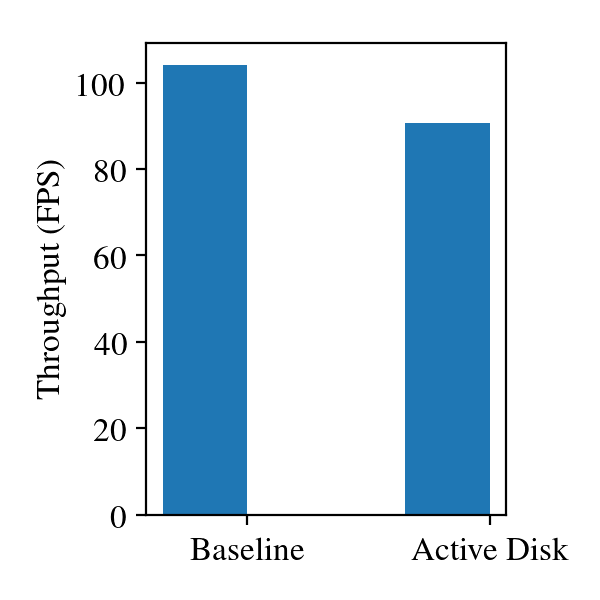

In [10]:
%matplotlib notebook

workloads = ['videodiff', ]

for workload in workloads:             

    expnames = ['baseline_{}'.format(workload), 'smart_{}'.format(workload)] # sorting doesn't matter for video

    # filter and sort by expnames
    df = pd.concat([df_all[df_all['expname']==el] for el in expnames], ignore_index=True)
    print df

    x = np.arange(len(df))
    width = .35

    fig, ax = plt.subplots(figsize=(3,3))
    ax.bar(x - width/2, 1000./df['avg_wall_ms'], width) # Throughput
    ax.set_ylabel("Throughput (FPS)")
    
#     ax.bar(x - width/2, df['avg_wall_ms'], width, label="Avg. wall-clock time")
#     ax.bar(x + width/2, df['avg_cpu_ms'], width, label="Avg. CPU time")
#     ax.set_ylabel("Millisecond per image")
#     plt.legend()

    plt.xticks(x, ['Baseline', 'Active Disk'], rotation=0)
    plt.tight_layout()
    plt.savefig('micro-{}.pdf'.format(workload), bbox_inches ='tight')